# Two Way (Between) Analysis of Variance (ANOVA)

In [15]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 16}) 
import savingfigR as sf 
import pingouin as pg 
import pandas as pd 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import scipy.stats as stats
import cohens_d as cD
from statsmodels.sandbox.stats.multicomp import multipletests

## 2-Way ANOVA Example 

In [2]:
bloodpressure = np.array([158,163,173,178,168,188,183,198,178,193,186,191,196,181,176,185,190,195,200,180]).astype(int)
biofeedback = np.concatenate((np.repeat('present', 10), np.repeat('absent', 10))) # need to be dummy coded
drug = np.concatenate((np.repeat('present', 5), np.repeat('absent', 5), np.repeat('present', 5), np.repeat('absent', 5))) # need to be dummy coded
biofeedbackDC = np.concatenate(([0]*10, [1]*10))
drugDC = np.concatenate(([0]*5, [1]*5, [0]*5, [1]*5))
df_int = pd.DataFrame(data=np.array([bloodpressure, biofeedback, drug]).T, columns=['BP', 'BF', 'D'])
df_DC = pd.DataFrame(data=np.array([bloodpressure, biofeedbackDC, drugDC]).T, columns=['BP', 'BF', 'D'])

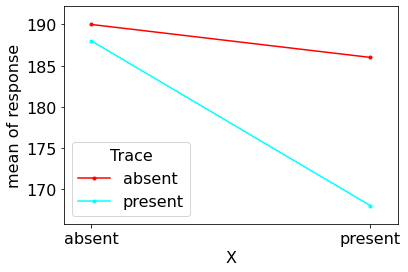

In [3]:
fig = interaction_plot(drug, biofeedback, bloodpressure)
plt.show()

sf.best_save(fig, 'interaction')

In [4]:
model = ols(formula='BP ~ D + BF + D:BF', data=df_DC).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

          sum_sq    df      F    PR(>F)
D          720.0   1.0  11.52  0.003706
BF         500.0   1.0   8.00  0.012109
D:BF       320.0   1.0   5.12  0.037917
Residual  1000.0  16.0    NaN       NaN


## Testing Normality 

In [5]:
stats.shapiro(bloodpressure[0:5]) # group 1

ShapiroResult(statistic=0.9867621660232544, pvalue=0.9671738743782043)

In [6]:
stats.shapiro(bloodpressure[5:10]) # group 2

ShapiroResult(statistic=0.9867621660232544, pvalue=0.9671739339828491)

In [7]:
stats.shapiro(bloodpressure[10:15]) # group 3

ShapiroResult(statistic=0.9867621660232544, pvalue=0.9671739339828491)

In [8]:
stats.shapiro(bloodpressure[15:21]) # group 4

ShapiroResult(statistic=0.9867621660232544, pvalue=0.9671739339828491)

## Homogenous of Variance 

In [9]:
# unsure how to do 

## Interaction Effect, Mean Comparison 

In [17]:
# nobiofeed, nodrug vs nobiofeed, drug
pval_nbnd_v_nbd = stats.ttest_ind(bloodpressure[0:5], bloodpressure[5:10], alternative = "two-sided")[1]
# biofeed, nodrug vs biofeed, drug
pval_bnd_v_bd = stats.ttest_ind(bloodpressure[10:15], bloodpressure[15:21], alternative = "two-sided")[1]
pvals = np.array([pval_nbnd_v_nbd, pval_bnd_v_bd])
p_adjusted = multipletests(pvals, method='holm')[1][:]
print(p_adjusted)

[0.00789955 0.44681333]


## Main Effect, Mean Comparisons

In [11]:
# drug vs no drug --- group all data as with or without drug
drug_main = np.concatenate([bloodpressure[0:5],bloodpressure[10:15]])
nodrug_main = np.concatenate([bloodpressure[5:10],bloodpressure[15:21]])
pval_d_v_nd = stats.ttest_ind(drug_main, nodrug_main, alternative = "two-sided")[1]
# biofeedback vs no biofeedback
biof_main = bloodpressure[0:10]
nobiof_main = bloodpressure[10:21]
pval_bf_v_nbf = stats.ttest_ind(biof_main, nobiof_main, alternative = "two-sided")[1]
print(pval_d_v_nd) # not sure why this isn't correct

0.015663843118946773


In [12]:
print(pval_bf_v_nbf) # but this is 

0.05004919409559345


## Effect Sizes

In [13]:
cD.cohensd_2ind(drug_main, nodrug_main)

1.1730212128345283

## Power

In [14]:
# none in pinguoin 